# DREAM EXPERIMENT: C/S ratio vs inclination of BGO

Importing modules

In [12]:
import matplotlib.pyplot as plt
import numpy as np

## Scintillation vs Cherenkov light
Here the aim is to plot the ratio: $\frac{N_C}{N_s}$, the number of Cherenkov photon produced over the number of scintillation ones. In order to do that, it si needed to load a lot of files.

#### Loading files & first analysis:

In [13]:
# directory
directory = '../datasets/ReflTransm/'
preFileName = '_'
postFileName = '_degrees.txt'

# angles:
theta_names = ['m20','m15','m10','m5','0','p5','p10','p15','p20','p25','p30','p35']
angles = [20,15,10,5,0,-5,-10,-15,-20,-25,-30,-35]
fileNames = [preFileName + i + postFileName for i in theta_names]

# defining quantities
energyC, energyS, numberC, numberS = [],[],[],[]
delta_numberC, delta_numberS = [],[] # errors: poissos
for name in fileNames:
    a, b, c, d = np.loadtxt(directory+name, unpack=True, usecols=(4,5,6,7))
    # mean number of produced photons for each incoming muon
    energyC.append(sum(a)/len(a))
    energyS.append(sum(b)/len(b))
    numberC.append(sum(c)/len(c))
    numberS.append(sum(d)/len(d))
    delta_numberC.append(np.sqrt(sum(c))/len(c))
    delta_numberS.append(np.sqrt(sum(d))/len(d))

num_ratio, delta_num_ratio, energy_ratio = [],[],[]

for idx,value in enumerate(numberC):
    # ratio
    ratio = numberC[idx]/numberS[idx]
    num_ratio.append(ratio)
    # error on ratio
    delta = ratio*np.sqrt(1/numberC[idx] + 1/numberS[idx])
    delta_num_ratio.append(delta)
    # energetic ratio
    energy_ratio.append(energyC[idx]/energyS[idx])

/var/folders/dr/0kfsv0410yqcv4gkk8gg9vbc0000gn/T/ipykernel_14393/1867223180.py:15: UserWarning: loadtxt: Empty input file: "../datasets/ReflTransm/_m20_degrees.txt"
  a, b, c, d = np.loadtxt(directory+name, unpack=True, usecols=(4,5,6,7))


ValueError: not enough values to unpack (expected 4, got 0)

Writing in an output file:

In [5]:
out = open(directory+'CS_ratio.txt', 'w')

out.write('#angle(°)\tnumber_C\tdelta_nC\tnumber_S\tdelta_nS\tNumRatio\tdeltaNumRatio\tenergyratio\n')

for i,val in enumerate(angles):
    string = '{0}\t{1}\t{2:.4E}\t{3}\t{4:.4E}\t{5:.4E}\t{6:.4E}\t{7:.4E}\n'.format(val, numberC[i], delta_numberC[i], numberS[i],
                                                             delta_numberS[i], num_ratio[i], delta_num_ratio[i],
                                                             energy_ratio[i])
    out.write(string)

out.close()

C/S ratio

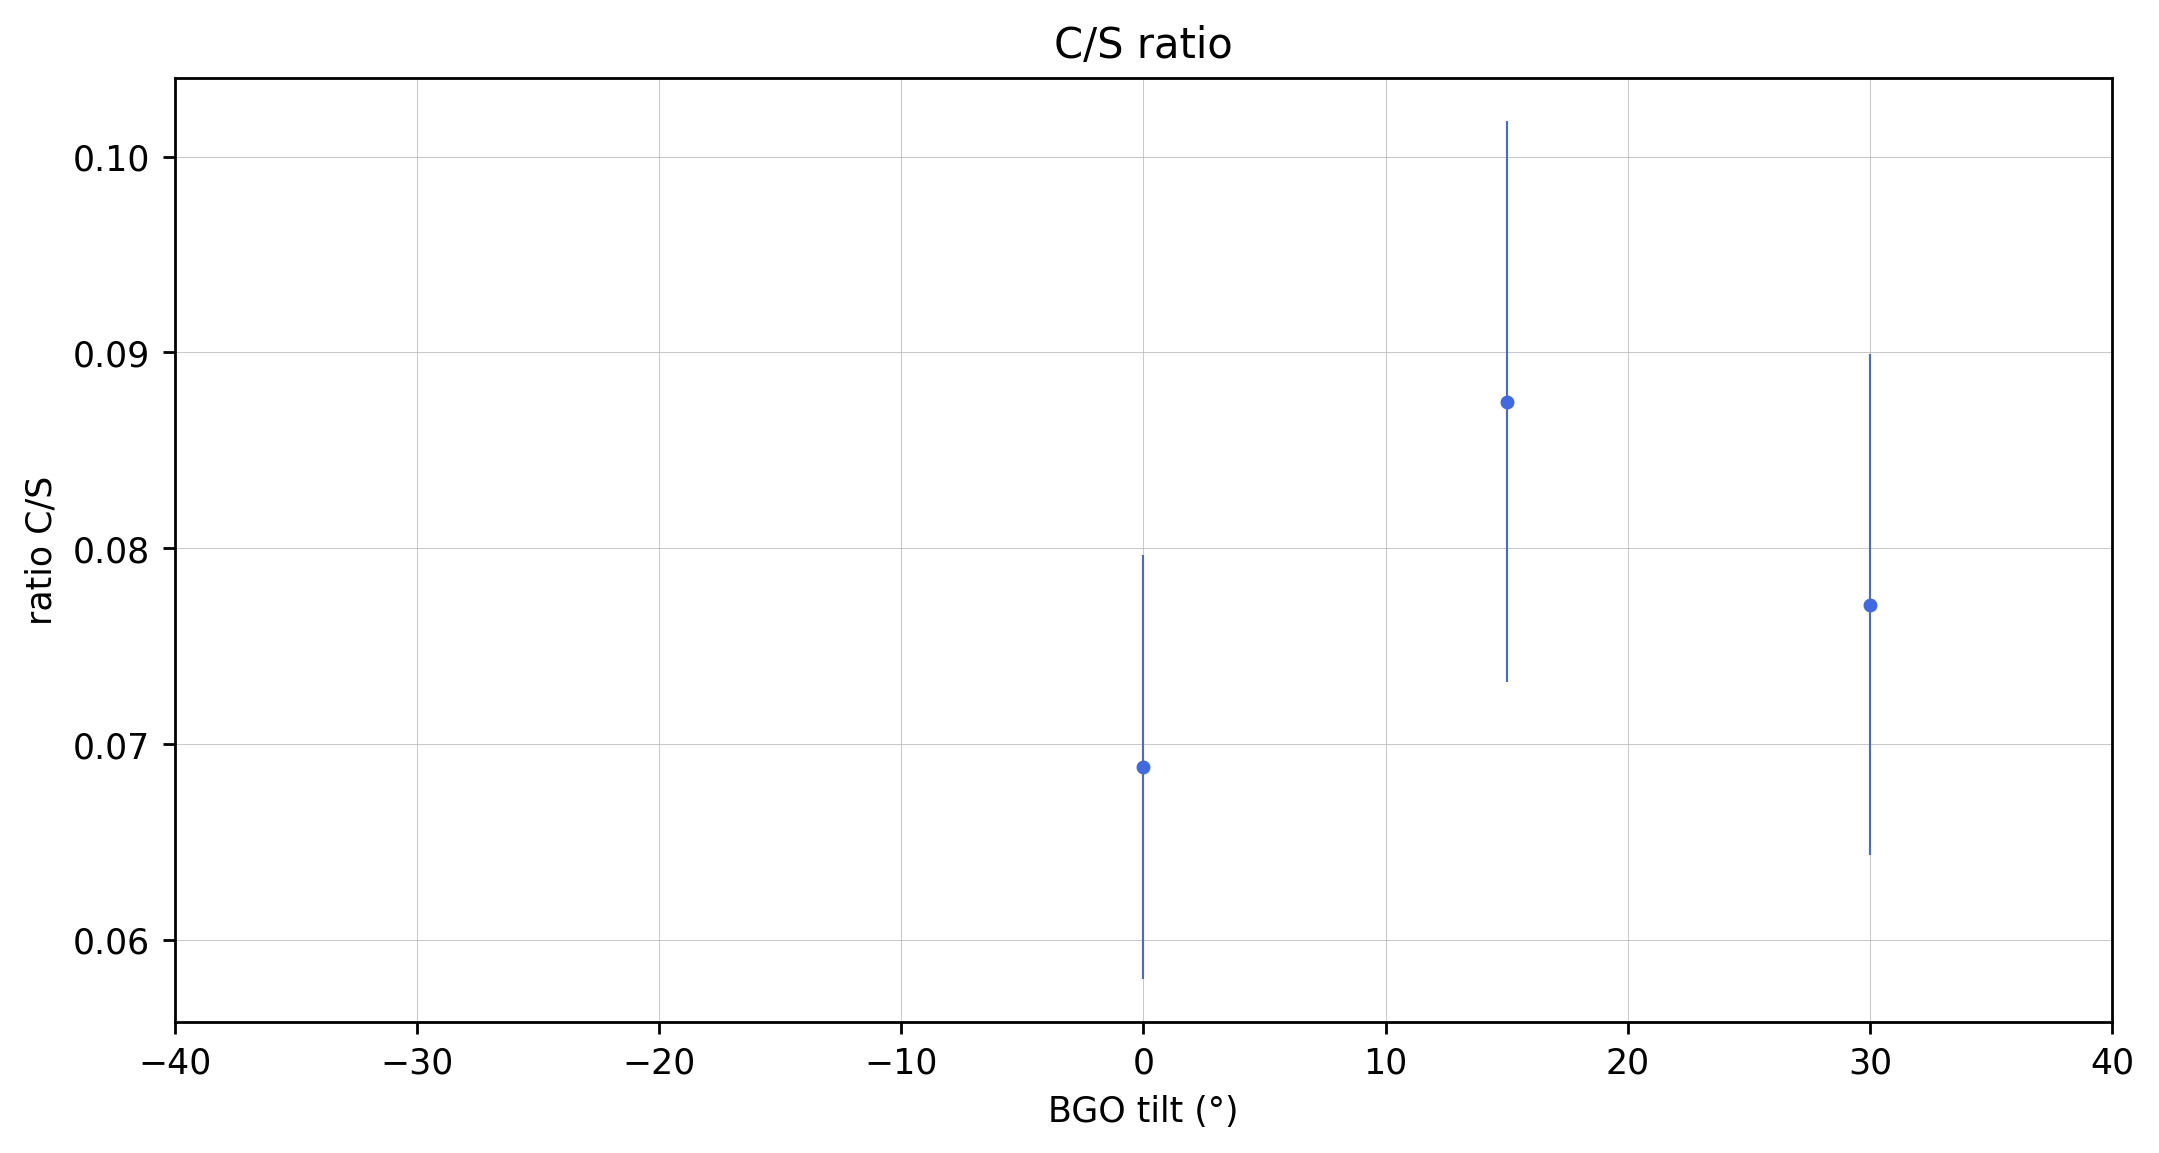

In [7]:
# prepare the figure
fig = plt.figure(111, figsize=(10,5), dpi=250)

# plot data
plt.errorbar(angles, num_ratio, yerr=delta_num_ratio, xerr=None, label='C/S number of $\gamma$s',
             marker='o', markersize=3, color="royalblue", ecolor="royalblue", lw=0., elinewidth=0.6)

# visualize
plt.title('C/S ratio')
plt.xlabel('BGO tilt (°)')
plt.ylabel('ratio C/S')
plt.xlim([-40,40])
plt.grid(linestyle='-', linewidth=0.2)
plt.show()
fig.savefig("CS_ratio.jpg",bbox_inches='tight')

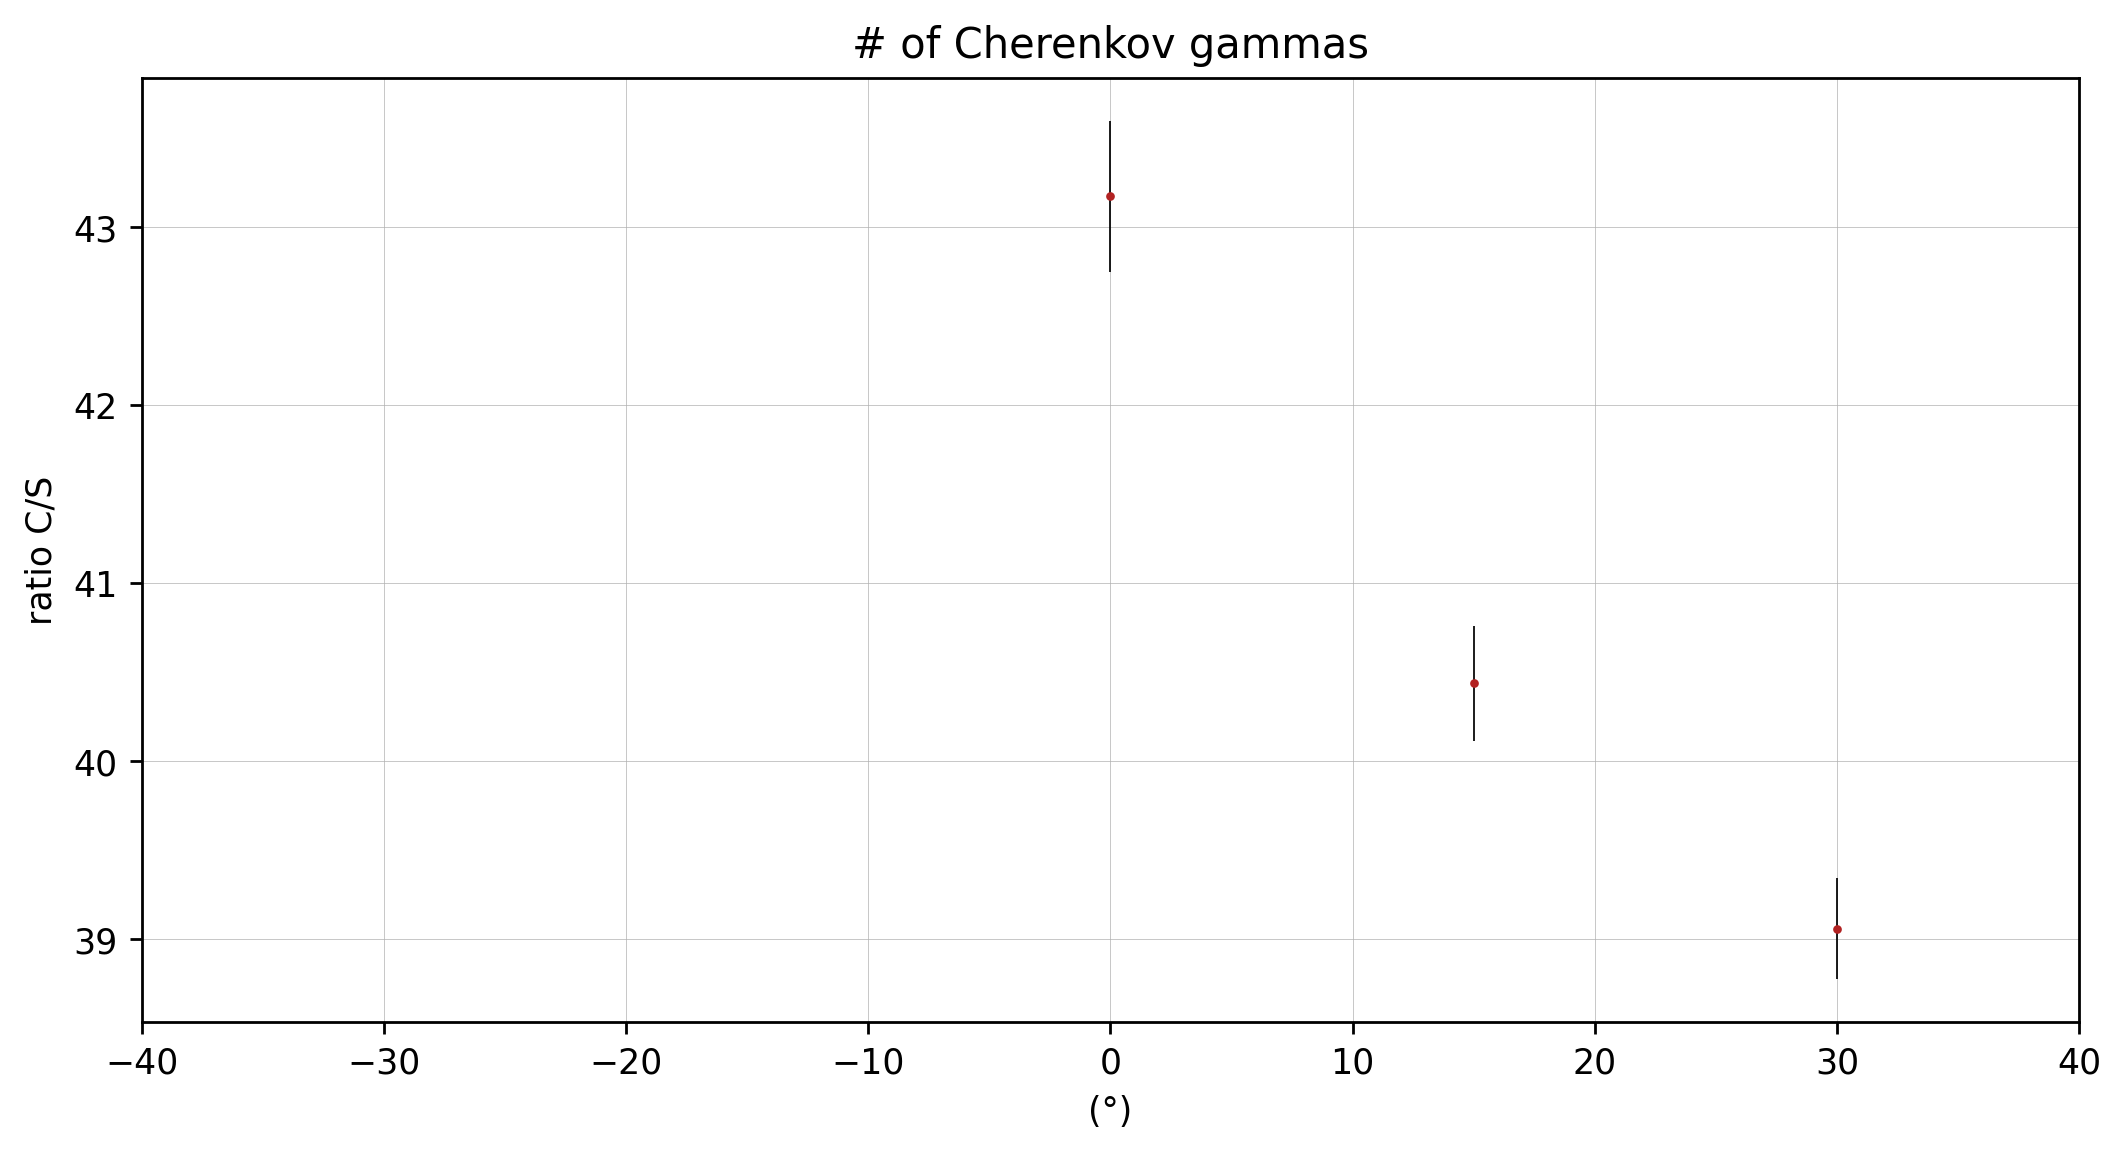

In [9]:
# prepare the figure
fig = plt.figure(111, figsize=(10,5), dpi=250)

# plot data
plt.errorbar(angles, numberC, yerr=delta_numberC, xerr=None, label='Cherenkov number of $\gamma$s',
             marker='o', markersize=1.5, color="firebrick", ecolor="black", lw=0., elinewidth=0.5)

# visualize
plt.title('# of Cherenkov gammas')
plt.xlabel('(°)')
plt.ylabel('ratio C/S')
plt.xlim([-40,40])
plt.grid(linestyle='-', linewidth=0.2)
plt.show()
fig.savefig("number_C.jpg",bbox_inches='tight')

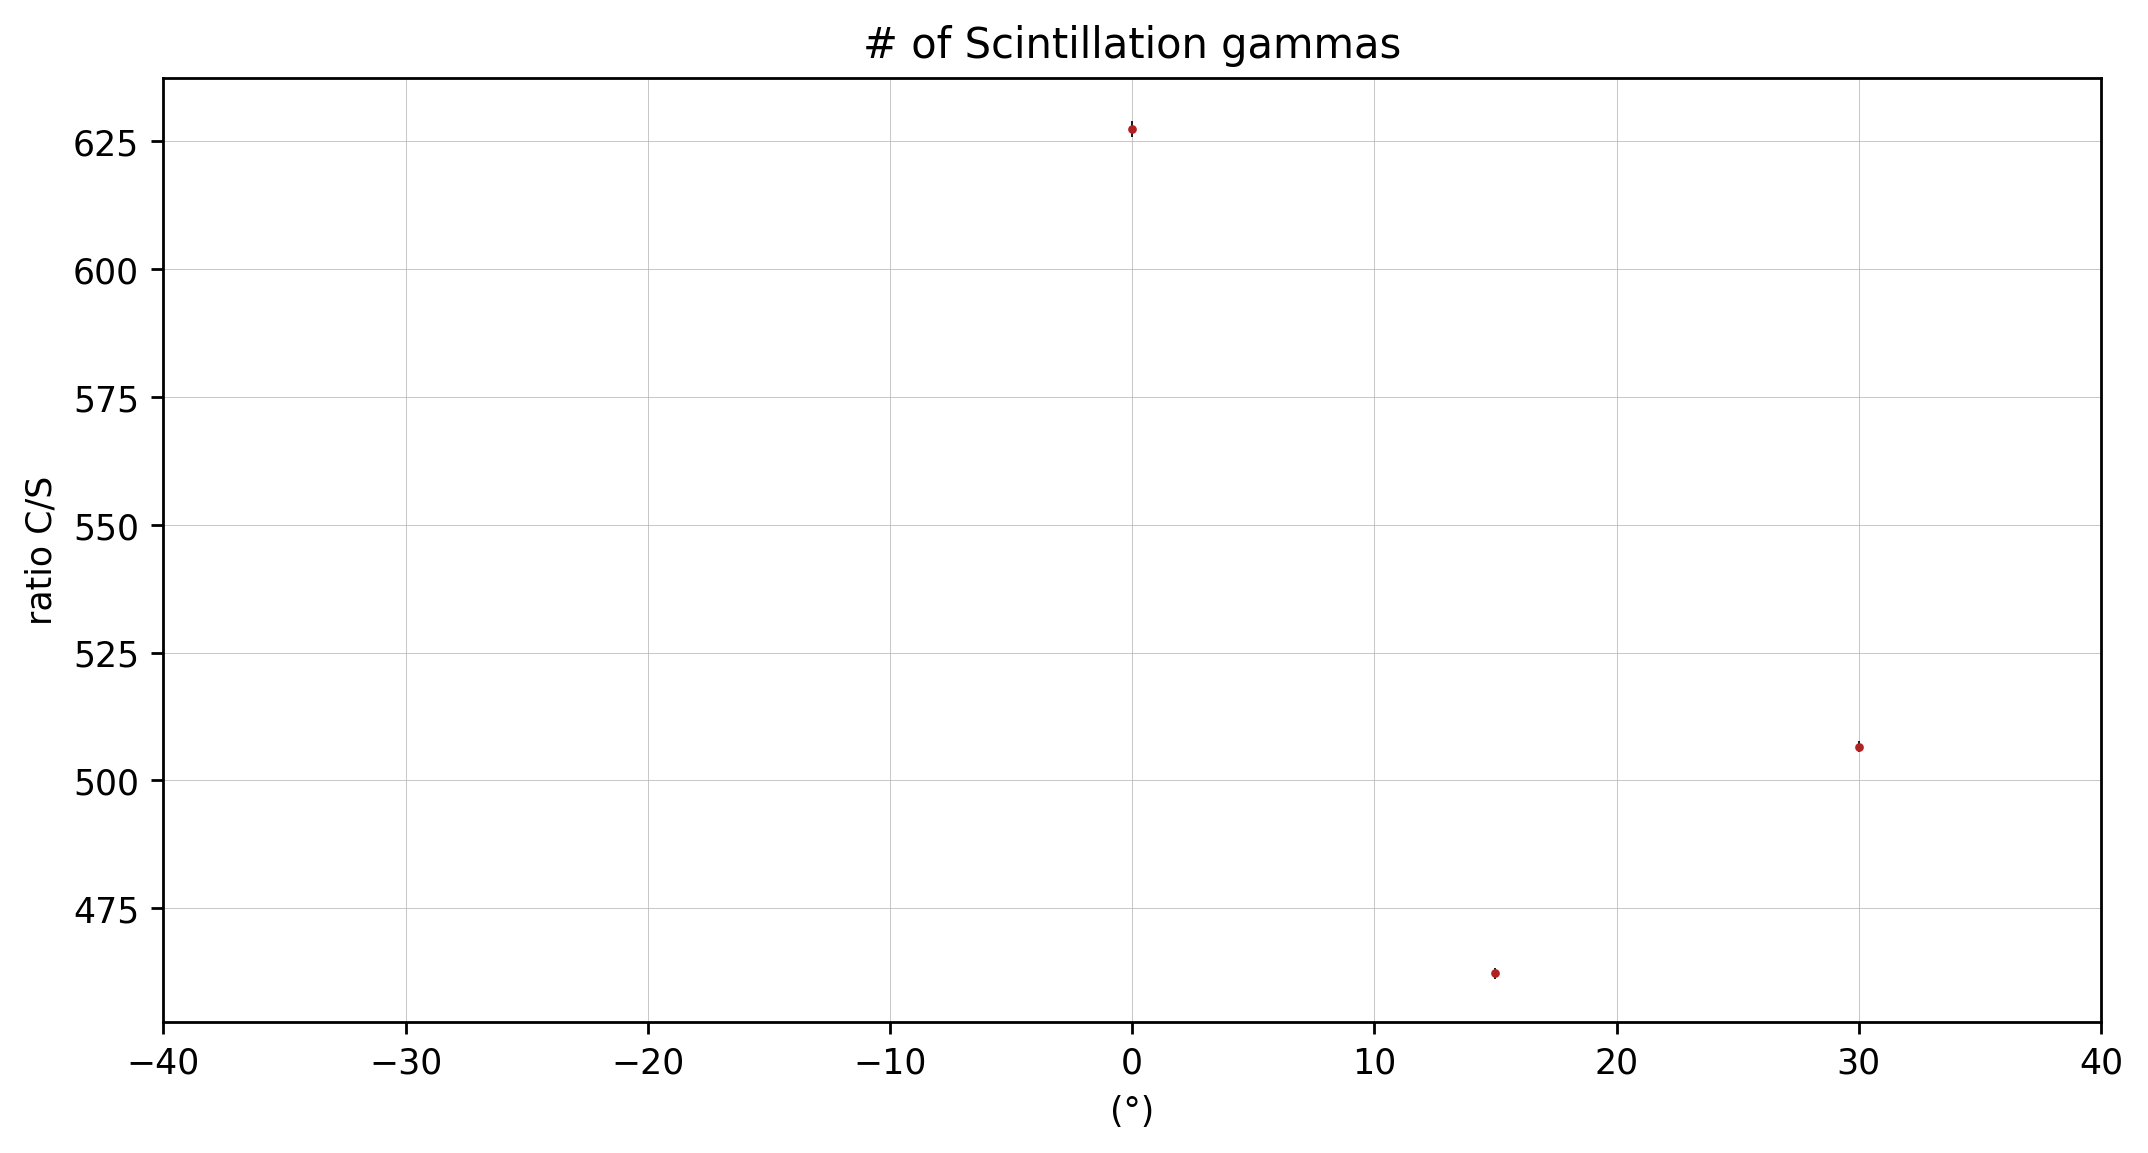

In [10]:
# prepare the figure
fig = plt.figure(111, figsize=(10,5), dpi=250)

# plot data
plt.errorbar(angles, numberS, yerr=delta_numberS, xerr=None, label='Cherenkov number of $\gamma$s',
             marker='o', markersize=1.5, color="firebrick", ecolor="black", lw=0., elinewidth=0.5)

# visualize
plt.title('# of Scintillation gammas')
plt.xlabel('(°)')
plt.ylabel('ratio C/S')
plt.xlim([-40,40])
plt.grid(linestyle='-', linewidth=0.2)
plt.show()
fig.savefig("number_S.jpg",bbox_inches='tight')

## Angular distribution of muons

Loading data from `positions.txt`:

In [ ]:
# loading data from simulation
x,y,theta,phi = np.loadtxt("positions.txt", unpack=True, usecols=(0,1,2,3))
directions = np.loadtxt("positions.txt", unpack=True, usecols=(4,5,6))
positions = np.loadtxt("positions.txt", unpack=True, usecols=(7,8,9))
angles_check = np.loadtxt("goodangles.txt", unpack=True, usecols=(0))

# corrections due to the new generation method
for idx,t in enumerate(theta):
    theta[idx] = np.pi - t

# rescaling of units: mm -> cm
x = 0.1*x
y = 0.1*y

# number of Monte Carlo events
if(len(x)==len(y)==len(theta)==len(phi)):
    print('Data are of equal length. You have {0} events'.format(len(x)))
else:
    print('There are problems in reading out data')

Theoretical distributions of randomic angles:
- Polar angle $\phi \in [0,2\pi]$:
$$p(\phi) = \frac{1}{2\pi}$$
- Azimuthal angle $\theta \in [0,\frac{\pi}{2}]$ (restriction):
$$p(\theta) = 3\cos(\theta)^2$$

In [ ]:
# theoretical distribution functions of angles
def Ptheta(x):
    return 4*np.cos(x)*np.cos(x)/np.pi

# generation of samples for theta
sample_angles_theta = np.arange(0, 0.5*np.pi, 0.01)
sample_angulardistribution_theta = Ptheta(sample_angles_theta)

# generation of samples for phi
sample_angles_phi = np.arange(0, 2*np.pi, 0.01)
sample_angulardistribution_phi = [0.5/np.pi for i in np.arange(0, len(sample_angles_phi))]

Histograms of randomic angles

In [ ]:
# prepare the figure
fig = plt.figure(111, figsize=(9,5), dpi=250)

#plot of histos & functions
plt.hist(theta, bins=15, label=r'angle $\theta$', histtype="stepfilled",
         color="teal", ec="darkslategray", alpha=0.3, lw=0.75, density=True)
plt.hist(phi, bins=100, label=r'angle $\phi$', histtype='stepfilled',
         color="seagreen", ec="darkgreen", alpha=0.3,  lw=0.75, density=True)
#plt.plot(sample_angles_theta, sample_angulardistribution_theta,
#         label=r'$p(\theta)=\frac{4}{\pi}\cos(\theta)^2$', lw=0.65 , color="black")
plt.plot(sample_angles_phi, sample_angulardistribution_phi,
         label=r'$p(\phi) = \frac{1}{2\pi}$', lw=0.65, color='black')
plt.plot(sample_angles_theta, 3*np.cos(sample_angles_theta)*np.cos(sample_angles_theta)*np.sin(sample_angles_theta),
         label=r'$p(\theta)=3\cos(\theta)^2\sin(\theta)$', lw=0.65 , color="black")

# visualize
plt.title('Angular distribution of $\mu^-$ flux')
plt.xlabel(r'$\theta$, $\phi$ (rad)')
plt.ylabel(r'$p(\theta)$, $p(\phi)$ & frequencies')
plt.xlim(0, 2*np.pi)
plt.legend()
plt.show()
#fig.savefig("AngularDistribution.jpg",bbox_inches='tight')

In [ ]:
good_phis = []
good_thetas = []

# I want to find good angless to generate muons
for idx,check in enumerate(angles_check):
    if check==True:
        if idx<len(phi):
            good_phis.append(phi[idx])
            good_thetas.append(theta[idx])

# plot these angles to have an idea:
fig = plt.figure(111, figsize=(9,5), dpi=250)
plt.plot(good_phis, good_thetas, marker='^', markersize=2, lw=0, color='black')

# a line
sample_angles_phi = np.arange(0, 2*np.pi, 0.01)
sample_angulardistribution_phi = [0.6 for i in np.arange(0, len(sample_angles_phi))]
plt.plot(sample_angles_phi, sample_angulardistribution_phi, label='maximum value', lw=0.65, color='black')

# text
plt.text(5.11, 1.24, 'There are no\nevents above\nthe line',
         bbox={'facecolor': 'white', 'alpha': 0.5, 'lw': 0.5, 'pad': 20})

# visualize
plt.title('Angles of detected $\mu^-$')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\theta$ (rad)')
plt.xlim(0, 2*np.pi)
plt.ylim(0, np.pi/2)
plt.show()
fig.savefig("good_angles.jpg",bbox_inches='tight')
